Goal: Predict who will buy Caravan Insurace

Data: 86 features including product usage data and socio-demographic dervied
1.   Load Train Data - Ticdata2000.txt
2.   Load Test Data - Ticeval2000.txt
3.   Load Target Value for Test Data - ticgts2000.txt
4.   Split Training Data into Test / Train
5.   Plot the train data 
6.   Choose Features worth Using






# 1 - Find relevant features for the prediction task

In [0]:
import pandas as pd

data = pd.read_csv('https://kdd.ics.uci.edu/databases/tic/ticdata2000.txt', sep="\t", header=None)
data.columns = """1 MOSTYPE Customer Subtype see L0
2 MAANTHUI Number of houses 1 10
3 MGEMOMV Avg size household 1 6
4 MGEMLEEF Avg age see L1
5 MOSHOOFD Customer main type see L2
6 MGODRK Roman catholic see L3
7 MGODPR Protestant ...
8 MGODOV Other religion
9 MGODGE No religion
10 MRELGE Married
11 MRELSA Living together
12 MRELOV Other relation
13 MFALLEEN Singles
14 MFGEKIND Household without children
15 MFWEKIND Household with children
16 MOPLHOOG High level education
17 MOPLMIDD Medium level education
18 MOPLLAAG Lower level education
19 MBERHOOG High status
20 MBERZELF Entrepreneur
21 MBERBOER Farmer
22 MBERMIDD Middle management
23 MBERARBG Skilled labourers
24 MBERARBO Unskilled labourers
25 MSKA Social class A
26 MSKB1 Social class B1
27 MSKB2 Social class B2
28 MSKC Social class C
29 MSKD Social class D
30 MHHUUR Rented house
31 MHKOOP Home owners
32 MAUT1 1 car
33 MAUT2 2 cars
34 MAUT0 No car
35 MZFONDS National Health Service
36 MZPART Private health insurance
37 MINKM30 Income LT 30.000
38 MINK3045 Income 30-45.000
39 MINK4575 Income 45-75.000
40 MINK7512 Income 75-122.000
41 MINK123M Income GT 123.000
42 MINKGEM Average income
43 MKOOPKLA Purchasing power class
44 PWAPART Contribution private third party insurance see L4
45 PWABEDR Contribution third party insurance (firms) ...
46 PWALAND Contribution third party insurane (agriculture)
47 PPERSAUT Contribution car policies
48 PBESAUT Contribution delivery van policies
49 PMOTSCO Contribution motorcycle/scooter policies
50 PVRAAUT Contribution lorry policies
51 PAANHANG Contribution trailer policies
52 PTRACTOR Contribution tractor policies
53 PWERKT Contribution agricultural machines policies 
54 PBROM Contribution moped policies
55 PLEVEN Contribution life insurances
56 PPERSONG Contribution private accident insurance policies
57 PGEZONG Contribution family accidents insurance policies
58 PWAOREG Contribution disability insurance policies
59 PBRAND Contribution fire policies
60 PZEILPL Contribution surfboard policies
61 PPLEZIER Contribution boat policies
62 PFIETS Contribution bicycle policies
63 PINBOED Contribution property insurance policies
64 PBYSTAND Contribution social security insurance policies
65 AWAPART Number of private third party insurance 1 - 12
66 AWABEDR Number of third party insurance (firms) ...
67 AWALAND Number of third party insurane (agriculture)
68 APERSAUT Number of car policies
69 ABESAUT Number of delivery van policies
70 AMOTSCO Number of motorcycle/scooter policies
71 AVRAAUT Number of lorry policies
72 AAANHANG Number of trailer policies
73 ATRACTOR Number of tractor policies
74 AWERKT Number of agricultural machines policies
75 ABROM Number of moped policies
76 ALEVEN Number of life insurances
77 APERSONG Number of private accident insurance policies
78 AGEZONG Number of family accidents insurance policies
79 AWAOREG Number of disability insurance policies
80 ABRAND Number of fire policies
81 AZEILPL Number of surfboard policies
82 APLEZIER Number of boat policies
83 AFIETS Number of bicycle policies
84 AINBOED Number of property insurance policies
85 ABYSTAND Number of social security insurance policies
86 CARAVAN Number of mobile home policies 0 - 1""".split("\n")

print(data)

      1 MOSTYPE Customer Subtype see L0  ...  86 CARAVAN Number of mobile home policies 0 - 1
0                                    33  ...                                                0
1                                    37  ...                                                0
2                                    37  ...                                                0
3                                     9  ...                                                0
4                                    40  ...                                                0
...                                 ...  ...                                              ...
5817                                 36  ...                                                0
5818                                 35  ...                                                0
5819                                 33  ...                                                1
5820                                 34  ...                

Feature selection

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
plotData = {}
X = data.loc[:,"1 MOSTYPE Customer Subtype see L0":"85 ABYSTAND Number of social security insurance policies"]
Y = data.loc[:, "86 CARAVAN Number of mobile home policies 0 - 1"]

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
for index, item in enumerate(model.feature_importances_):
  plotData.update({data.columns[index]: item})
  print(str(data.columns[index]), ": ", item)

1 MOSTYPE Customer Subtype see L0 :  0.03324498861385763
2 MAANTHUI Number of houses 1 10 :  0.007691086319434984
3 MGEMOMV Avg size household 1 6 :  0.011446758626637011
4 MGEMLEEF Avg age see L1 :  0.01380828318484086
5 MOSHOOFD Customer main type see L2 :  0.023847979444312533
6 MGODRK Roman catholic see L3 :  0.01024421250763903
7 MGODPR Protestant ... :  0.016278337185116266
8 MGODOV Other religion :  0.013942715109326159
9 MGODGE No religion :  0.015004164206702388
10 MRELGE Married :  0.015514260186504099
11 MRELSA Living together :  0.010620507514369878
12 MRELOV Other relation :  0.01151480360890896
13 MFALLEEN Singles :  0.014272895951643959
14 MFGEKIND Household without children :  0.0146979977478805
15 MFWEKIND Household with children :  0.01517698412788451
16 MOPLHOOG High level education :  0.01414090275321405
17 MOPLMIDD Medium level education :  0.01852478540274273
18 MOPLLAAG Lower level education :  0.018130814037204464
19 MBERHOOG High status :  0.014325553322370762


## Look at which features are most enticing

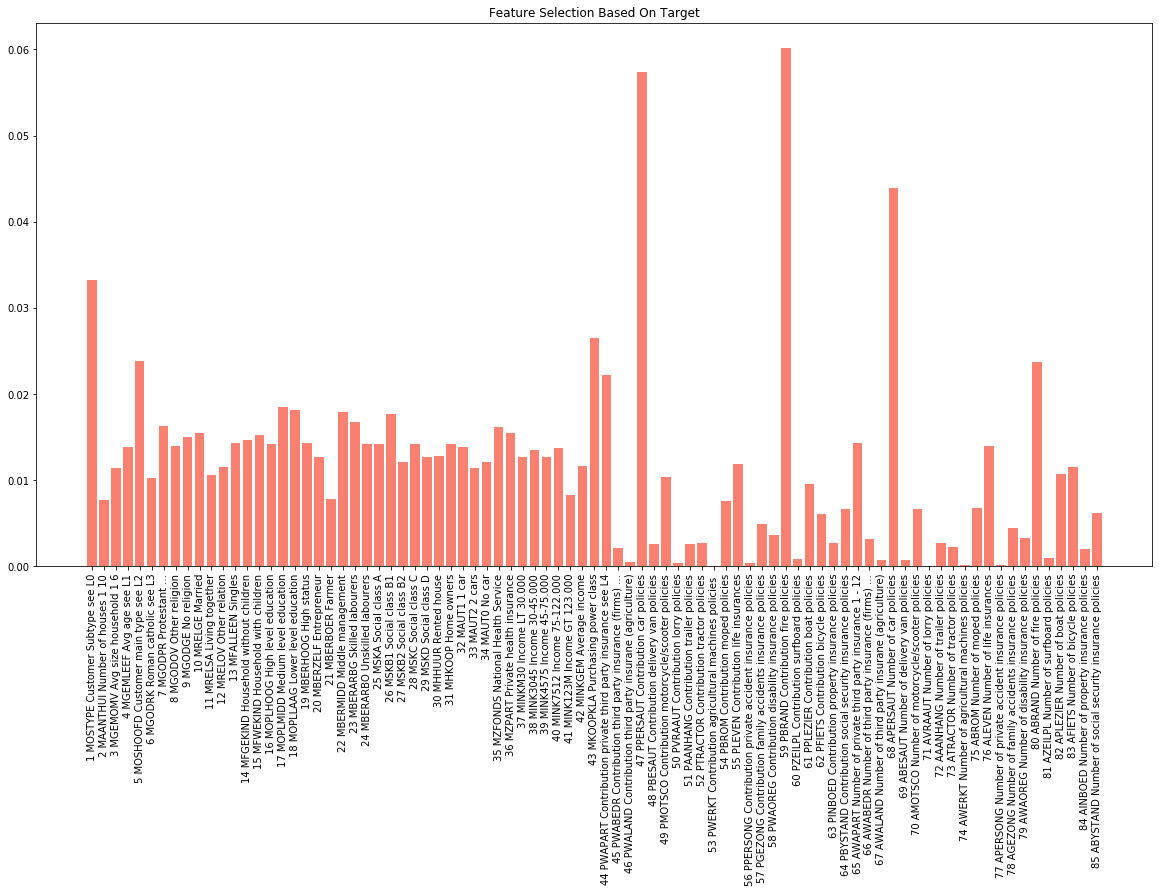

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
plt.bar(plotData.keys(), plotData.values(), color="salmon")
plt.xticks(rotation=90)
plt.title("Feature Selection Based On Target")
plt.show()

# 2 - Train A Logistic Regression Model with L1 regularization

In [0]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20)

In [0]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# scaler to training / test data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Scaled data - train: .5, test: .52
# Non sclaed data - train: .94, test: .93

In [0]:
# Use logistic regression with L1 regularization
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', C=.01, solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))

Coefficient of each feature: [[-0.02388564  0.          0.          0.          0.          0.
   0.          0.         -0.03916412  0.          0.          0.
   0.          0.          0.          0.          0.         -0.03603302
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.17855708
  -0.0976733   0.          0.          0.         -0.1319     -0.13618347
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.13587036  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.00818731  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]]
Trainin

 Tune With Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create logistic regression
lr = LogisticRegression()

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C)

# Create grid search
gridSearch = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

# Fit grid search on training data
best_model = gridSearch.fit(X_train, y_train)

# View best hyperparameters
print("############################################################")
print("Best C:", best_model.best_estimator_.get_params()["C"])
print("Accuracy:", best_model.best_score_)
print("Coefficients:", best_model.best_estimator_.coef_)
print("############################################################")

# Scaled data - C: 1.0, Accuracy:.93
# Non Scaled data - C: 1.0, Accuracy: .93

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


############################################################
Best C: 2.7825594022071245
Accuracy: 0.9405194469927117
Coefficients: [[ 0.08594404 -0.27845367 -0.06054107  0.15191562 -0.39558118 -0.17099967
  -0.08388373 -0.10787829 -0.14015181  0.21726308  0.06146954  0.15751574
  -0.05534927 -0.07409175 -0.03277972 -0.02742568 -0.15457392 -0.24396793
   0.07933976  0.09892929 -0.14390546  0.14824289  0.05069459  0.08402625
   0.02899762  0.02675579  0.02729623  0.1393356   0.06796484 -0.50169202
  -0.43264855  0.27116527  0.26061778  0.16293863 -0.39722716 -0.47870456
   0.11070781  0.11914817  0.09441181  0.09253052 -0.1472486   0.06789828
   0.08365526  0.25495182 -0.16774737 -0.35122249  0.25876661 -0.00996457
  -0.04971703 -0.22571366  0.18455856  0.08430946 -0.34778032 -0.07361618
  -0.48851541 -0.32514138  0.23953778  0.31977652  0.24584115  0.05800971
   0.59175434  0.30698527 -0.08368509  0.14932555 -0.13583699 -0.03177098
  -0.1116037  -0.21030288 -0.06155569  0.11229545 -0.04

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
lrData = {}

for key, value in zip(plotData.keys(), best_model.best_estimator_.coef_[0]):
  lrData.update({key: value})
  print(key, str(value))

1 MOSTYPE Customer Subtype see L0 0.08594403937695246
2 MAANTHUI Number of houses 1 10 -0.2784536662967307
3 MGEMOMV Avg size household 1 6 -0.0605410737182902
4 MGEMLEEF Avg age see L1 0.15191562213758958
5 MOSHOOFD Customer main type see L2 -0.3955811808585087
6 MGODRK Roman catholic see L3 -0.17099966607321207
7 MGODPR Protestant ... -0.0838837279296526
8 MGODOV Other religion -0.10787829265206361
9 MGODGE No religion -0.1401518084971225
10 MRELGE Married 0.21726307878490012
11 MRELSA Living together 0.061469543937962036
12 MRELOV Other relation 0.15751573815066508
13 MFALLEEN Singles -0.05534927209078686
14 MFGEKIND Household without children -0.07409175469103864
15 MFWEKIND Household with children -0.03277971924954854
16 MOPLHOOG High level education -0.027425676842311158
17 MOPLMIDD Medium level education -0.15457392032901343
18 MOPLLAAG Lower level education -0.24396793466350403
19 MBERHOOG High status 0.0793397551549949
20 MBERZELF Entrepreneur 0.0989292942061067
21 MBERBOER Fa

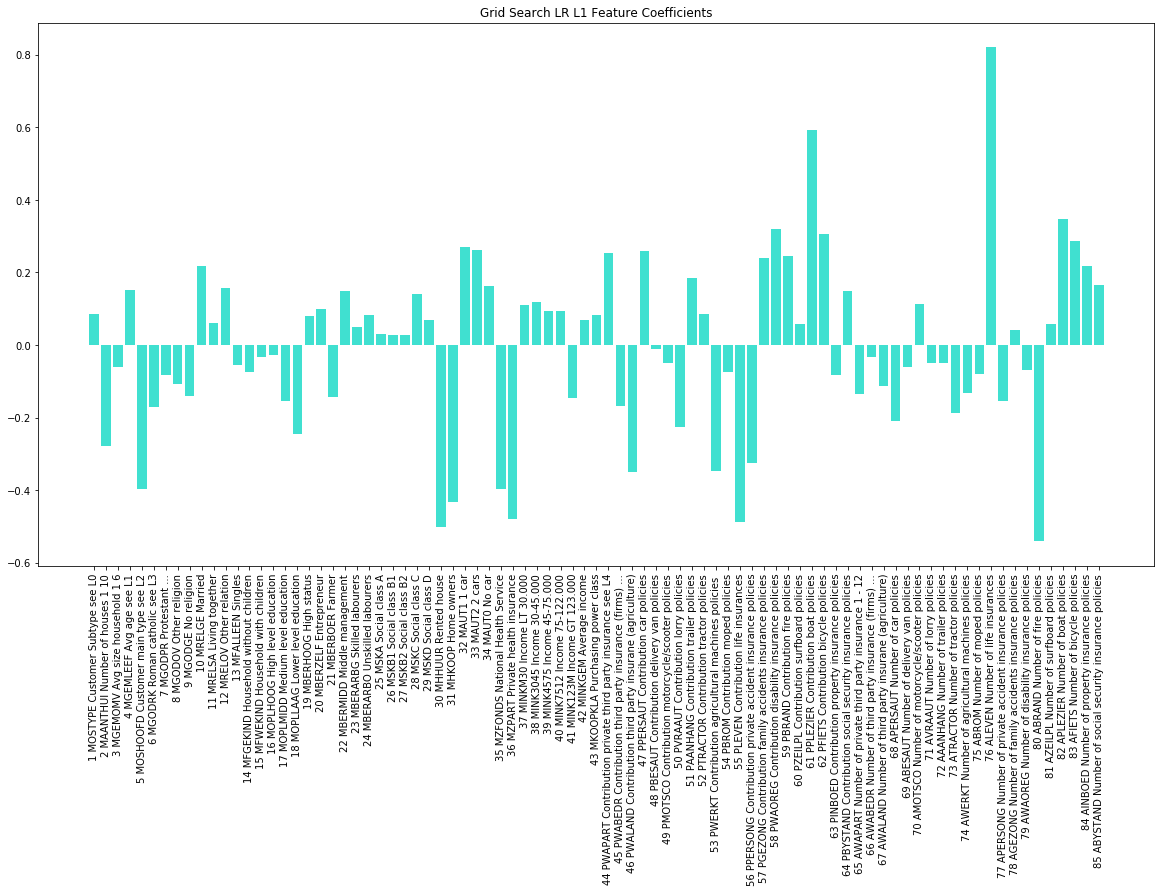

In [0]:
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
plt.bar(plotData.keys(), best_model.best_estimator_.coef_[0], color="turquoise")
plt.xticks(rotation=90)
plt.title("Grid Search LR L1 Feature Coefficients")
plt.show()

The above bar chart shows that the highest weighted values are: 

*   76 ALEVEN Number of life insurances: 0.820622036619981
*   61 PPLEZIER Contribution boat policies: 0.5917543442042068
*   82 APLEZIER Number of boat policies: 0.3474909615342241
*   58 PWAOREG Contribution disability insurance policies: 0.3197765182279651
*   62 PFIETS Contribution bicycle policies: 0.30698526847470814
*   83 AFIETS Number of bicycle policies: 0.2866305069596913
*   32 MAUT1 1 car: 0.2711652665441386
*   33 MAUT2 2 cars: 0.26061777659508717
*   47 PPERSAUT Contribution car policies: 0.25876660721752354
*   44 PWAPART Contribution private third party insurance see L4: 0.25495182038851644


This does not entirely line up with the features chosen from feature selection. 
A couple features do, #44, #47. The features I earlier thought to be enticing were:

*   59 PBRAND Contribution fire policies: 0.06645529945387464
*   47 PPERSAUT Contribution car policies: 0.054852171020320604
*   68 APERSAUT Number of car policies: 0.04216304590124324
*   1 MOSTYPE Customer Subtype see L0: 0.032618780588738856
*   44 PWAPART Contribution private third party insurance see L4: 0.029182348451839105
*   43 MKOOPKLA Purchasing power class: 0.028439887894946874
*   65 AWAPART Number of private third party insurance 1 - 12: 0.025740135028725773
*   80 ABRAND Number of fire policies: 0.0245824520464323
*   5 MOSHOOFD Customer main type see L2: 0.023846384739552928
*   42 MINKGEM Average income: 0.018340948409660805



# 3 - Generate polynomial features and use LogReg with L1, does accuracy increase?

### The accuracy stayed the same.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

poly = PolynomialFeatures()
X_bc_poly = poly.fit_transform(X_train_std)
print(X_train_std.shape)
print(X_bc_poly.shape)

scores = cross_val_score(LogisticRegression(penalty="l1", C=0.01, solver='liblinear'), X_train_std, y_train, cv=10)    
np.mean(scores), np.std(scores)

scores = cross_val_score(LogisticRegression(penalty="l1", C=0.01, solver='liblinear'), X_bc_poly, y_train, cv=10)
np.mean(scores), np.std(scores)

(4657, 85)
(4657, 3741)


(0.9413780054455673, 0.0019480913863475222)

#4 - Use classification model - Trees, Forest, Gradient Boosting, SVM

### No real tuning was required, could do grid search but getting very high accuracy as is. 

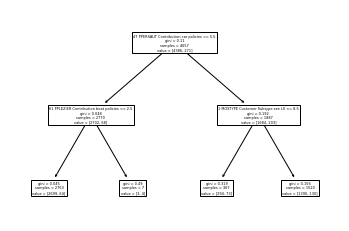

In [0]:
# Tree based model
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

from sklearn.tree import plot_tree
tree_dot = plot_tree(tree, feature_names=data.columns)

In [0]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

print("Training Scores:", train_scores)
print("Testing Scores:", test_scores)

Training Scores: [0.9598453940304917, 0.9768091045737599, 0.9881898217736741, 0.9879750912604681, 0.9907665879321451, 0.9914107794717629, 0.9926991625509985, 0.9922697015245866, 0.9929138930642044, 0.9929138930642044, 0.9926991625509985, 0.9926991625509985, 0.9933433540906162, 0.9931286235774104, 0.9931286235774104, 0.9931286235774104, 0.9933433540906162, 0.9933433540906162, 0.9933433540906162, 0.9935580846038222]
Testing Scores: [0.8798283261802575, 0.9244635193133047, 0.9175965665236051, 0.9210300429184549, 0.9218884120171674, 0.9210300429184549, 0.9201716738197425, 0.91931330472103, 0.9201716738197425, 0.9210300429184549, 0.9210300429184549, 0.9218884120171674, 0.9210300429184549, 0.9210300429184549, 0.9201716738197425, 0.9218884120171674, 0.9210300429184549, 0.9218884120171674, 0.9210300429184549, 0.9218884120171674]


In [116]:
# Gradient Boosting
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

ValueError: ignored

In [114]:
# SVM
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

# Accuracy 
print("Accuracy: {}%".format(clf.score(X_test, y_test) * 100 ))

# F1 score
print("F1 score:", f1_score(y_test, clf_predictions.round(), average="weighted"))

Accuracy: 93.73390557939915%
F1 score: 0.9070219308170482


# 5 - Explainable model

In [0]:
# For the explainable model I will be going with a simple linear regression
# The coefficients will be the 10 features I found during feature extraction. 
# I am interested to see if I can get the accuracy as high as the other more
# complex models.

from sklearn.linear_model import LinearRegression



### Will have to resplit data to not include so many columns. Data janitor yay.

In [41]:

# Sorted the features I selected in descending order
sortedFeatureSelectionData = {k: v for k, v in sorted(
      plotData.items(), 
      key=lambda item: item[1], 
      reverse=True
    )}

print("######################################")
print("Feature Selection Correlation Values")
print("######################################")

for item in sortedFeatureSelectionData.items():
  print(item, "\n")

# Sorted the LR weights in descending order
sortedLogisticRegressionData = {k: v for k, v in sorted(
      lrData.items(), 
      key=lambda item: item[1], 
      reverse=True
    )}

print("######################################")
print("Logistic Regression Weight Values")
print("######################################")

for item in sortedLogisticRegressionData.items():
  print(item, "\n")

# I sorted these and made new dicts so I can easily [index] the first 10 results

######################################
Feature Selection Correlation Values
######################################
('59 PBRAND Contribution fire policies', 0.060111054774844824) 

('47 PPERSAUT Contribution car policies', 0.05741976798706878) 

('68 APERSAUT Number of car policies', 0.043918883666123336) 

('1 MOSTYPE Customer Subtype see L0', 0.03324498861385763) 

('43 MKOOPKLA Purchasing power class', 0.026458926859075114) 

('5 MOSHOOFD Customer main type see L2', 0.023847979444312533) 

('80 ABRAND Number of fire policies', 0.023656646446406342) 

('44 PWAPART Contribution private third party insurance see L4', 0.022197228730093915) 

('17 MOPLMIDD Medium level education', 0.01852478540274273) 

('18 MOPLLAAG Lower level education', 0.018130814037204464) 

('22 MBERMIDD Middle management', 0.01785875901327661) 

('26 MSKB1 Social class B1', 0.0177049553368492) 

('23 MBERARBG Skilled labourers', 0.016746868890049258) 

('7 MGODPR Protestant ...', 0.016278337185116266) 

('35 MZFON

In [62]:
# So now that I forsure can select the top 10 features from feature selection
# I can use them for the linear regression model. 

selectedFeatures = [
  "59 PBRAND Contribution fire policies",
  "47 PPERSAUT Contribution car policies",
  "68 APERSAUT Number of car policies",
  "1 MOSTYPE Customer Subtype see L0",
  "44 PWAPART Contribution private third party insurance see L4",
  "43 MKOOPKLA Purchasing power class",
  "65 AWAPART Number of private third party insurance 1 - 12",
  "80 ABRAND Number of fire policies",
  "5 MOSHOOFD Customer main type see L2",
  "42 MINKGEM Average income",
]

# Changes to the 10 column values
X = data[selectedFeatures]

# Y stays the same our target doesn't change
Y = data.loc[:, "86 CARAVAN Number of mobile home policies 0 - 1"]

# Verify data isn't garbage
print(X)
print("###################################")
print(Y)

      59 PBRAND Contribution fire policies  ...  42 MINKGEM Average income
0                                        5  ...                          4
1                                        2  ...                          5
2                                        2  ...                          3
3                                        2  ...                          4
4                                        6  ...                          6
...                                    ...  ...                        ...
5817                                     3  ...                          3
5818                                     5  ...                          4
5819                                     4  ...                          3
5820                                     0  ...                          4
5821                                     0  ...                          3

[5822 rows x 10 columns]
###################################
0       0
1       0
2       0
3       

In [87]:
# Train test split new data and run it through a simple linear model
# to see if the features are at all useful for this simpler more explainable
# model

# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20)

# empty model
reg = LinearRegression()

# feed the linear regression with the train data to obtain a model.
reg.fit(X_train, y_train)

# check that the coeffients are the expected ones.
w1 = reg.coef_[0]
w2 = m = reg.coef_[1]
w3 = reg.coef_[2]
w4 = reg.coef_[3]
w5 = reg.coef_[4]
w6 = reg.coef_[5]
w7 = reg.coef_[6]
w8 = reg.coef_[7]
w9 = reg.coef_[8]
w10 = reg.coef_[9]
b = reg.intercept_

# This is the linear regression forumula
print("y = {0} * x1 + {1} * x2 + {2} * x3 + {3} * x4 + {4} * x5 + {5} * x6 + {6} * x7 + {7} * x8 + {8} * x9 + {9} * x10 + {10}".format(w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, b))

# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % reg.score(X_test, y_test))

y = 0.01153729312445567 * x1 + 0.007670599278355172 * x2 + 0.013431332700769112 * x3 + 0.004703576926360045 * x4 + 0.023528053293277958 * x5 + 0.007886943555074697 * x6 + -0.025923307713322248 * x7 + -0.024477779471730847 * x8 + -0.022151224827140978 * x9 + 0.00777518015712569 * x10 + -0.036505685826864226
Mean squared error: 0.06
Variance score: 0.05


# This time around I tried the features that were found to be the best in logistic regression. I also slimmed it down to the best performing features. Only 4 instead of 10 like I had above. More explainable. 

In [99]:
# I am curious what the linear regression looks like using the features
# that worked well with logistic regression.

logisticRegressionBestFeatures = [
    "82 APLEZIER Number of boat policies",
    "83 AFIETS Number of bicycle policies",
    "47 PPERSAUT Contribution car policies",
    "44 PWAPART Contribution private third party insurance see L4",
]

# Changes to the 10 column values
X = data[logisticRegressionBestFeatures]

# Y stays the same our target doesn't change
Y = data.loc[:, "86 CARAVAN Number of mobile home policies 0 - 1"]

# Verify data isn't garbage
print(X)
print("###################################")
print(Y)

# Train test split new data and run it through a simple linear model
# to see if the features are at all useful for this simpler more explainable
# model

# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20)

# empty model
reg = LinearRegression()

# feed the linear regression with the train data to obtain a model.
reg.fit(X_train, y_train)

# check that the coeffients are the expected ones.
w1 = reg.coef_[0]
w2 = reg.coef_[1]
w3 = reg.coef_[2]
w4 = reg.coef_[3]
b = reg.intercept_

# This is the linear regression forumula
print("y = {0} * x1 + {1} * x2 + {2} * x3 + {3} * x4 + {4}".format(w1, w2, w3, w4, b))

# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % reg.score(X_test, y_test))

      82 APLEZIER Number of boat policies  ...  44 PWAPART Contribution private third party insurance see L4
0                                       0  ...                                                  0           
1                                       0  ...                                                  2           
2                                       0  ...                                                  2           
3                                       0  ...                                                  0           
4                                       0  ...                                                  0           
...                                   ...  ...                                                ...           
5817                                    0  ...                                                  2           
5818                                    0  ...                                                  0           
5819               

In [117]:
# Now i need to get the F1 score and accuracy for this model
from sklearn.metrics import f1_score

# Calculate the F1 score
f1_score(y_test, reg.predict(X_test).round(), average="weighted")


0.9091175185778417

### It seems that the more explainable model is on par in terms of the F1 score. I'm not confident that this is all implemented correctly but my model is performing on par in terms of f1 score with my SVM used above in part number 4. 